### Instructions
# Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
# Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

# Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data

In [2]:
target = pd.read_csv("target.csv")
numerical = pd.read_csv("numerical.csv")
categorical = pd.read_csv("categorical.csv")

In [3]:
#concatenate our data
df=pd.concat([target, numerical, categorical], axis=1)
df.head()

,TARGET_B,TARGET_D,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,0.0,0,60.000000,5,9,0,0,39,34,...,37,12,92,8,94,2,95,12,89,11
1,0,0.0,1,46.000000,6,9,16,0,15,55,...,52,2,93,10,95,12,95,12,93,10
2,0,0.0,1,61.611649,3,1,2,0,20,29,...,0,2,91,11,92,7,95,12,90,1
3,0,0.0,0,70.000000,1,4,2,0,23,14,...,28,1,87,11,94,11,95,12,87,2
4,0,0.0,0,78.000000,3,2,60,1,28,9,...,20,1,93,10,96,1,96,1,79,3


In [4]:
df.isna().sum()

TARGET_B        0
TARGET_D        0
TCODE           0
AGE             0
INCOME          0
               ..
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
Length: 339, dtype: int64

In [5]:
#get the numericals values
numericals = df.select_dtypes(np.number)
numericals

,TARGET_B,TARGET_D,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,0.0,0,60.000000,5,9,0,0,39,34,...,37,12,92,8,94,2,95,12,89,11
1,0,0.0,1,46.000000,6,9,16,0,15,55,...,52,2,93,10,95,12,95,12,93,10
2,0,0.0,1,61.611649,3,1,2,0,20,29,...,0,2,91,11,92,7,95,12,90,1
3,0,0.0,0,70.000000,1,4,2,0,23,14,...,28,1,87,11,94,11,95,12,87,2
4,0,0.0,0,78.000000,3,2,60,1,28,9,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,1,61.611649,5,9,0,14,36,47,...,0,2,96,2,96,2,96,2,96,2
95408,0,0.0,1,48.000000,7,9,1,0,31,43,...,50,1,96,3,96,3,96,3,96,3
95409,0,0.0,1,60.000000,5,9,0,0,18,46,...,38,1,96,3,95,1,96,10,94,10
95410,1,18.0,0,58.000000,7,9,0,0,28,35,...,40,5,90,11,96,8,97,1,86,12


In [6]:
#get the categoricals values
categoricals=df.select_dtypes(object)
categoricals

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S
...,...,...,...,...,...,...,...
95407,other,H,M,L,G,C,C
95408,TX,H,M,L,F,A,C
95409,MI,H,M,L,E,B,C
95410,CA,H,F,L,F,A,C


In [25]:
df['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [26]:
y = df['TARGET_B']
X = df.drop(['TARGET_B'], axis = 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first').fit(categoricals)

enc_categoricals = enc.transform(categoricals).toarray()
encoded_categoricals = pd.DataFrame(enc_categoricals)

In [28]:
X = pd.concat([numericals, encoded_categoricals], axis = 1)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=38)


### Sanity check

In [30]:
X

,TARGET_B,TARGET_D,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,14,15,16,17,18,19,20,21,22,23
0,0,0.0,0,60.000000,5,9,0,0,39,34,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,1,46.000000,6,9,16,0,15,55,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,1,61.611649,3,1,2,0,20,29,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,0,70.000000,1,4,2,0,23,14,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,0,78.000000,3,2,60,1,28,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,1,61.611649,5,9,0,14,36,47,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0,0.0,1,48.000000,7,9,1,0,31,43,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0,0.0,1,60.000000,5,9,0,0,18,46,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,1,18.0,0,58.000000,7,9,0,0,28,35,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [32]:
y.value_counts().to_frame()

,TARGET_B
0,90569
1,4843


We have can see imbalanced data, I'll use SMOTE technique to balance the data

In [33]:
x_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)


In [34]:
y_train_resampled.value_counts().to_frame().T


,1,0
TARGET_B,60662,60662


# Random forest classifier

In [35]:
classifier = RandomForestClassifier(random_state = 38)
classifier.fit(X_train, y_train)
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 1.0
Test Score : 1.0


In [36]:
y_pred = classifier.predict(X_test)

In [37]:
accuracy_train = classifier.score(X_train, y_train)
print(f"Accuracy on the training set: {accuracy_train:.0%}")

Accuracy on the training set: 100%


In [38]:
accuracy_test = classifier.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy_test:.0%}")

Accuracy on the test set: 100%


In [39]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[29907,     0],
       [    0,  1579]])

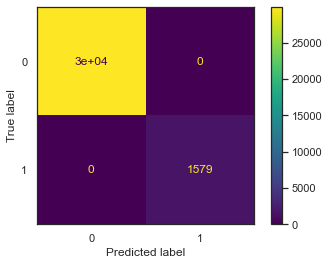

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29907
           1       1.00      1.00      1.00      1579

    accuracy                           1.00     31486
   macro avg       1.00      1.00      1.00     31486
weighted avg       1.00      1.00      1.00     31486



In [40]:
cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(classifier, X_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))
